In [307]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

In [308]:
data=pd.read_csv("train_regression.csv")
data.head()





,acid0,acid1,acid2,chlorides,sulphates0,sulphates1,sulphates2,density,score
0,0.173077,0.127451,0.144578,0.053412,0.121951,0.327146,0.104651,0.074995,65.514087
1,0.346154,0.186275,0.295181,0.083086,0.108014,0.341067,0.372093,0.094274,50.977518
2,0.269231,0.343137,0.144578,0.091988,0.181185,0.348028,0.372093,0.175631,51.040456
3,0.201923,0.205882,0.168675,0.077151,0.048780,0.250580,0.232558,0.047812,49.409349
4,0.317308,0.166667,0.186747,0.121662,0.104530,0.341067,0.337209,0.082707,50.467714


In [309]:
col=['acid0','acid1','acid2','chlorides','sulphates0','sulphates1','sulphates2','density']
X=data[col]
y=data['score']
print(data)
X['density']=X['density']*3.9




         acid0     acid1     acid2  chlorides  sulphates0  sulphates1  \
0     0.173077  0.127451  0.144578   0.053412    0.121951    0.327146   
1     0.346154  0.186275  0.295181   0.083086    0.108014    0.341067   
2     0.269231  0.343137  0.144578   0.091988    0.181185    0.348028   
3     0.201923  0.205882  0.168675   0.077151    0.048780    0.250580   
4     0.317308  0.166667  0.186747   0.121662    0.104530    0.341067   
...        ...       ...       ...        ...         ...         ...   
1995  0.384615  0.343137  0.295181   0.071217    0.121951    0.345708   
1996  0.432692  0.058824  0.204819   0.097923    0.017422    0.088167   
1997  0.250000  0.156863  0.162651   0.091988    0.114983    0.222738   
1998  0.413462  0.107843  0.240964   0.083086    0.247387    0.396752   
1999  0.317308  0.078431  0.216867   0.103858    0.062718    0.187935   

      sulphates2   density      score  
0       0.104651  0.074995  65.514087  
1       0.372093  0.094274  50.977518  
2  

/var/folders/m7/1vnzd02d0cqbyg9_x_3x0v1m0000gn/T/ipykernel_94687/1160223767.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['density']=X['density']*3.9


In [310]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4)


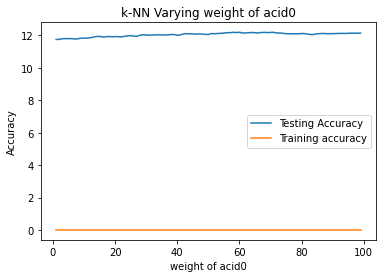

[1]
11.750718615839721


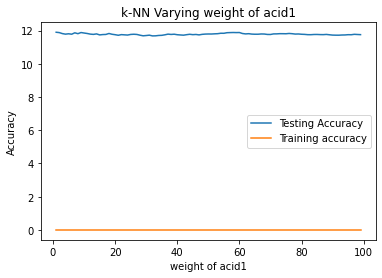

[32]
11.679001420615979


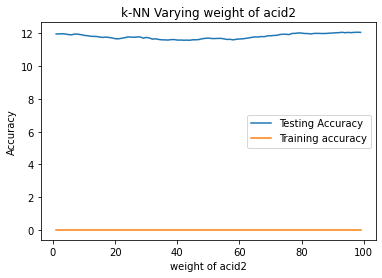

[44]
11.582846080852983


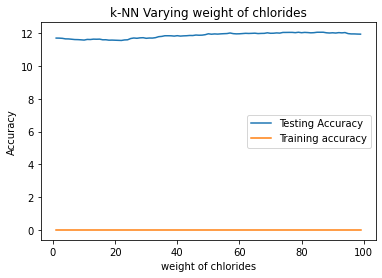

[22]
11.568577309736101


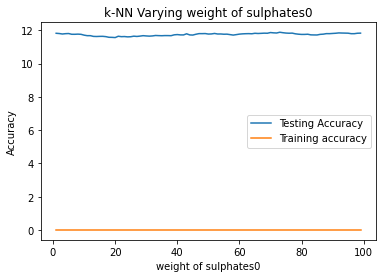

[20]
11.568577309736101


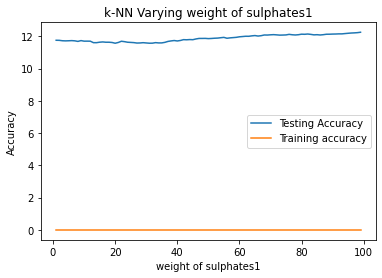

[20]
11.568577309736101


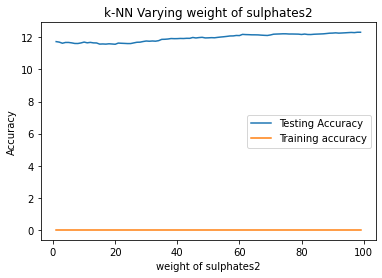

[20]
11.568577309736101


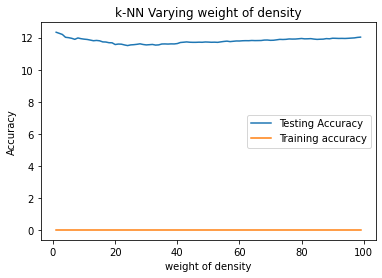

[24]
11.503612493984752


In [311]:
knn = KNeighborsRegressor(n_neighbors=7, weights='distance')
neighbors = np.arange(1,100)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
lst = [1,1,1,1,1,1,1,1,1]

idxi=0
for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['acid0'] = X_train['acid0']*k*0.05
    X_test_final['acid0'] = X_test['acid0']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = sqrt(mean_squared_error(y_train,knn.predict(X_train_final))) 
    test_accuracy[i] = sqrt(mean_squared_error(y_test,knn.predict(X_test_final))) 

plt.title('k-NN Varying weight of acid0')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of acid0')
plt.ylabel('Accuracy')
plt.show()
min_value = min(test_accuracy)
min_index = [index+1 for index, item in enumerate(test_accuracy) if item == min_value]
print(min_index)
print(min_value)
lst[idxi]=lst[idxi]*min_index[0]*0.05 
X_train['acid0']=X_train['acid0']*min_index[0]*0.05
X_test['acid0']=X_test['acid0']*min_index[0]*0.05

idxi=idxi+1
for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['acid1'] = X_train['acid1']*k*0.05
    X_test_final['acid1'] = X_test['acid1']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = sqrt(mean_squared_error(y_train,knn.predict(X_train_final))) 
    test_accuracy[i] = sqrt(mean_squared_error(y_test,knn.predict(X_test_final))) 

plt.title('k-NN Varying weight of acid1')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of acid1')
plt.ylabel('Accuracy')
plt.show()
min_value = min(test_accuracy)
min_index = [index+1 for index, item in enumerate(test_accuracy) if item == min_value]
print(min_index)
print(min_value)
lst[idxi]=lst[idxi]*min_index[0]*0.05 
X_train['acid1']=X_train['acid1']*min_index[0]*0.05
X_test['acid1']=X_test['acid1']*min_index[0]*0.05
idxi=idxi+1
for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['acid2'] = X_train['acid2']*k*0.05
    X_test_final['acid2'] = X_test['acid2']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = sqrt(mean_squared_error(y_train,knn.predict(X_train_final))) 
    test_accuracy[i] = sqrt(mean_squared_error(y_test,knn.predict(X_test_final))) 

plt.title('k-NN Varying weight of acid2')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of acid2')
plt.ylabel('Accuracy')
plt.show()
min_value = min(test_accuracy)
min_index = [index+1 for index, item in enumerate(test_accuracy) if item == min_value]
print(min_index)
print(min_value)
lst[idxi]=lst[idxi]*min_index[0]*0.05 
X_train['acid2']=X_train['acid2']*min_index[0]*0.05
X_test['acid2']=X_test['acid2']*min_index[0]*0.05

idxi=idxi+1
for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['chlorides'] = X_train['chlorides'].apply(lambda x: x*k*0.05)
    X_test_final['chlorides'] = X_test['chlorides'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = sqrt(mean_squared_error(y_train,knn.predict(X_train_final))) 
    test_accuracy[i] = sqrt(mean_squared_error(y_test,knn.predict(X_test_final))) 

plt.title('k-NN Varying weight of chlorides')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of chlorides')
plt.ylabel('Accuracy')
plt.show()
min_value = min(test_accuracy)
min_index = [index+1 for index, item in enumerate(test_accuracy) if item == min_value]
print(min_index)
print(min_value)
lst[idxi]=lst[idxi]*min_index[0]*0.05 
X_train['chlorides']=X_train['chlorides']*min_index[0]*0.05
X_test['chlorides']=X_test['chlorides']*min_index[0]*0.05
idxi=idxi+1
for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['sulphates0'] = X_train['sulphates0'].apply(lambda x: x*k*0.05)
    X_test_final['sulphates0'] = X_test['sulphates0'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = sqrt(mean_squared_error(y_train,knn.predict(X_train_final))) 
    test_accuracy[i] = sqrt(mean_squared_error(y_test,knn.predict(X_test_final))) 

plt.title('k-NN Varying weight of sulphates0')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of sulphates0')
plt.ylabel('Accuracy')
plt.show()
min_value = min(test_accuracy)
min_index = [index+1 for index, item in enumerate(test_accuracy) if item == min_value]
print(min_index)
print(min_value)
lst[idxi]=lst[idxi]*min_index[0]*0.05 
X_train['sulphates0']=X_train['sulphates0']*min_index[0]*0.05
X_test['sulphates0']=X_test['sulphates0']*min_index[0]*0.05
idxi=idxi+1
for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['sulphates1'] = X_train['sulphates1'].apply(lambda x: x*k*0.05)
    X_test_final['sulphates1'] = X_test['sulphates1'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = sqrt(mean_squared_error(y_train,knn.predict(X_train_final))) 
    test_accuracy[i] = sqrt(mean_squared_error(y_test,knn.predict(X_test_final))) 

plt.title('k-NN Varying weight of sulphates1')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of sulphates1')
plt.ylabel('Accuracy')
plt.show()
min_value = min(test_accuracy)
min_index = [index+1 for index, item in enumerate(test_accuracy) if item == min_value]
print(min_index)
print(min_value)
lst[idxi]=lst[idxi]*min_index[0]*0.05 
X_train['sulphates1']=X_train['sulphates1']*min_index[0]*0.05
X_test['sulphates1']=X_test['sulphates1']*min_index[0]*0.05


idxi=idxi+1
for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['sulphates2'] = X_train['sulphates2'].apply(lambda x: x*k*0.05)
    X_test_final['sulphates2'] = X_test['sulphates2'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = sqrt(mean_squared_error(y_train,knn.predict(X_train_final))) 
    test_accuracy[i] = sqrt(mean_squared_error(y_test,knn.predict(X_test_final))) 

plt.title('k-NN Varying weight of sulphates2')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of sulphates2')
plt.ylabel('Accuracy')
plt.show()
min_value = min(test_accuracy)
min_index = [index+1 for index, item in enumerate(test_accuracy) if item == min_value]
print(min_index)
print(min_value)
lst[idxi]=lst[idxi]*min_index[0]*0.05 
X_train['sulphates2']=X_train['sulphates2']*min_index[0]*0.05
X_test['sulphates2']=X_test['sulphates2']*min_index[0]*0.05



idxi=idxi+1
for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['density'] = X_train['density'].apply(lambda x: x*k*0.05)
    X_test_final['density'] = X_test['density'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = sqrt(mean_squared_error(y_train,knn.predict(X_train_final))) 
    test_accuracy[i] = sqrt(mean_squared_error(y_test,knn.predict(X_test_final))) 

plt.title('k-NN Varying weight of density')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of density')
plt.ylabel('Accuracy')
plt.show()
min_value = min(test_accuracy)
min_index = [index+1 for index, item in enumerate(test_accuracy) if item == min_value]
print(min_index)
print(min_value)
lst[idxi]=lst[idxi]*min_index[0]*0.05 
X_train['density']=X_train['density']*min_index[0]*0.05
X_test['density']=X_test['density']*min_index[0]*0.05





In [312]:
lst

[0.05, 1.6, 2.2, 1.1, 1.0, 1.0, 1.0, 1.2000000000000002, 1]

In [313]:
lst

[0.05, 1.6, 2.2, 1.1, 1.0, 1.0, 1.0, 1.2000000000000002, 1]

In [314]:
X

,acid0,acid1,acid2,chlorides,sulphates0,sulphates1,sulphates2,density
0,0.173077,0.127451,0.144578,0.053412,0.121951,0.327146,0.104651,0.292481
1,0.346154,0.186275,0.295181,0.083086,0.108014,0.341067,0.372093,0.367669
2,0.269231,0.343137,0.144578,0.091988,0.181185,0.348028,0.372093,0.684962
3,0.201923,0.205882,0.168675,0.077151,0.048780,0.250580,0.232558,0.186466
4,0.317308,0.166667,0.186747,0.121662,0.104530,0.341067,0.337209,0.322556
...,...,...,...,...,...,...,...,...
1995,0.384615,0.343137,0.295181,0.071217,0.121951,0.345708,0.151163,0.630827
1996,0.432692,0.058824,0.204819,0.097923,0.017422,0.088167,0.209302,0.472932
1997,0.250000,0.156863,0.162651,0.091988,0.114983,0.222738,0.093023,0.152632
1998,0.413462,0.107843,0.240964,0.083086,0.247387,0.396752,0.139535,0.412782


         acid0     acid1     acid2  chlorides  sulphates0  sulphates1  \
0     0.173077  0.127451  0.144578   0.053412    0.121951    0.327146   
1     0.346154  0.186275  0.295181   0.083086    0.108014    0.341067   
2     0.269231  0.343137  0.144578   0.091988    0.181185    0.348028   
3     0.201923  0.205882  0.168675   0.077151    0.048780    0.250580   
4     0.317308  0.166667  0.186747   0.121662    0.104530    0.341067   
...        ...       ...       ...        ...         ...         ...   
1995  0.384615  0.343137  0.295181   0.071217    0.121951    0.345708   
1996  0.432692  0.058824  0.204819   0.097923    0.017422    0.088167   
1997  0.250000  0.156863  0.162651   0.091988    0.114983    0.222738   
1998  0.413462  0.107843  0.240964   0.083086    0.247387    0.396752   
1999  0.317308  0.078431  0.216867   0.103858    0.062718    0.187935   

      sulphates2   density      score  
0       0.104651  0.074995  65.514087  
1       0.372093  0.094274  50.977518  
2  

/var/folders/m7/1vnzd02d0cqbyg9_x_3x0v1m0000gn/T/ipykernel_94687/2641737570.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['acid0']=X['acid0']*lst[idx]*0.05
/var/folders/m7/1vnzd02d0cqbyg9_x_3x0v1m0000gn/T/ipykernel_94687/2641737570.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['acid1']=X['acid1']*lst[idx]*0.05
/var/folders/m7/1vnzd02d0cqbyg9_x_3x0v1m0000gn/T/ipykernel_94687/2641737570.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,acid0,acid1,acid2,chlorides,sulphates0,sulphates1,sulphates2,density
0,0.000433,0.010196,0.015904,0.002938,0.006098,0.016357,0.005233,0.004500
1,0.000865,0.014902,0.032470,0.004570,0.005401,0.017053,0.018605,0.005656
2,0.000673,0.027451,0.015904,0.005059,0.009059,0.017401,0.018605,0.010538
3,0.000505,0.016471,0.018554,0.004243,0.002439,0.012529,0.011628,0.002869
4,0.000793,0.013333,0.020542,0.006691,0.005226,0.017053,0.016860,0.004962
...,...,...,...,...,...,...,...,...
1995,0.000962,0.027451,0.032470,0.003917,0.006098,0.017285,0.007558,0.009705
1996,0.001082,0.004706,0.022530,0.005386,0.000871,0.004408,0.010465,0.007276
1997,0.000625,0.012549,0.017892,0.005059,0.005749,0.011137,0.004651,0.002348
1998,0.001034,0.008627,0.026506,0.004570,0.012369,0.019838,0.006977,0.006350


In [316]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

data=pd.read_csv("train_regression.csv")
data.head()



col=['acid0','acid1','acid2','chlorides','sulphates0','sulphates1','sulphates2','density']
X=data.iloc[:, :-1]
y=data['score']
print(data)


test=pd.read_csv("test_regression.csv")

clf=KNeighborsRegressor(n_neighbors=20, weights='distance')

X['density']=X['density']*3.9
test['density']=test['density']*3.9


clf.fit(X,y)
pred=clf.predict(test)




df=pd.DataFrame()
df['Id'] =0
df['Predicted']=pred
df['Id'] = df.index
print(df)

df.to_csv('ans2.csv',index=False) 
X

         acid0     acid1     acid2  chlorides  sulphates0  sulphates1  \
0     0.173077  0.127451  0.144578   0.053412    0.121951    0.327146   
1     0.346154  0.186275  0.295181   0.083086    0.108014    0.341067   
2     0.269231  0.343137  0.144578   0.091988    0.181185    0.348028   
3     0.201923  0.205882  0.168675   0.077151    0.048780    0.250580   
4     0.317308  0.166667  0.186747   0.121662    0.104530    0.341067   
...        ...       ...       ...        ...         ...         ...   
1995  0.384615  0.343137  0.295181   0.071217    0.121951    0.345708   
1996  0.432692  0.058824  0.204819   0.097923    0.017422    0.088167   
1997  0.250000  0.156863  0.162651   0.091988    0.114983    0.222738   
1998  0.413462  0.107843  0.240964   0.083086    0.247387    0.396752   
1999  0.317308  0.078431  0.216867   0.103858    0.062718    0.187935   

      sulphates2   density      score  
0       0.104651  0.074995  65.514087  
1       0.372093  0.094274  50.977518  
2  

/var/folders/m7/1vnzd02d0cqbyg9_x_3x0v1m0000gn/T/ipykernel_94687/1723068221.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['density']=X['density']*3.9


        Id  Predicted
0        0  50.866185
1        1  66.665228
2        2  64.761773
3        3  47.795242
4        4  35.278495
...    ...        ...
1995  1995  39.214112
1996  1996  33.942983
1997  1997  34.376976
1998  1998  56.000755
1999  1999  56.378989

[2000 rows x 2 columns]


,acid0,acid1,acid2,chlorides,sulphates0,sulphates1,sulphates2,density
0,0.173077,0.127451,0.144578,0.053412,0.121951,0.327146,0.104651,0.292481
1,0.346154,0.186275,0.295181,0.083086,0.108014,0.341067,0.372093,0.367669
2,0.269231,0.343137,0.144578,0.091988,0.181185,0.348028,0.372093,0.684962
3,0.201923,0.205882,0.168675,0.077151,0.048780,0.250580,0.232558,0.186466
4,0.317308,0.166667,0.186747,0.121662,0.104530,0.341067,0.337209,0.322556
...,...,...,...,...,...,...,...,...
1995,0.384615,0.343137,0.295181,0.071217,0.121951,0.345708,0.151163,0.630827
1996,0.432692,0.058824,0.204819,0.097923,0.017422,0.088167,0.209302,0.472932
1997,0.250000,0.156863,0.162651,0.091988,0.114983,0.222738,0.093023,0.152632
1998,0.413462,0.107843,0.240964,0.083086,0.247387,0.396752,0.139535,0.412782
